### Introduction


#### Project Title: Predicting Student Performance with Linear Regression

Objective:
Predict the final grade (G3) of students based on various features from the student performance dataset.

Significance:
Understanding factors influencing student performance can aid educators in implementing targeted interventions to support struggling students and enhance overall academic outcomes.

### Data Exploration and Understanding

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
# Load the dataset
df = pd.read_csv('student-mat.csv')

# Display the first few rows of the dataset
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### About Dataset Content
This is a dataset from the UCI datasets repository,This contains the final scores of students at the end of a math program with several 
features that might or might not impact the future outcome of these students.

### Attribute Information

- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)
- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)


In [25]:
# Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [26]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]


NOTE : No Duplicates or Missing Values were Found!

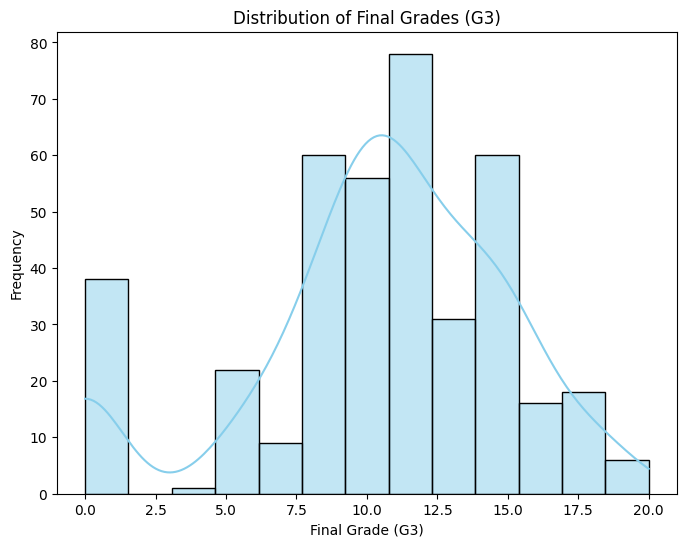

In [27]:
# Explore the distribution of the target variable (G3)
plt.figure(figsize=(8, 6))
sns.histplot(df['G3'], kde=True, color='skyblue')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

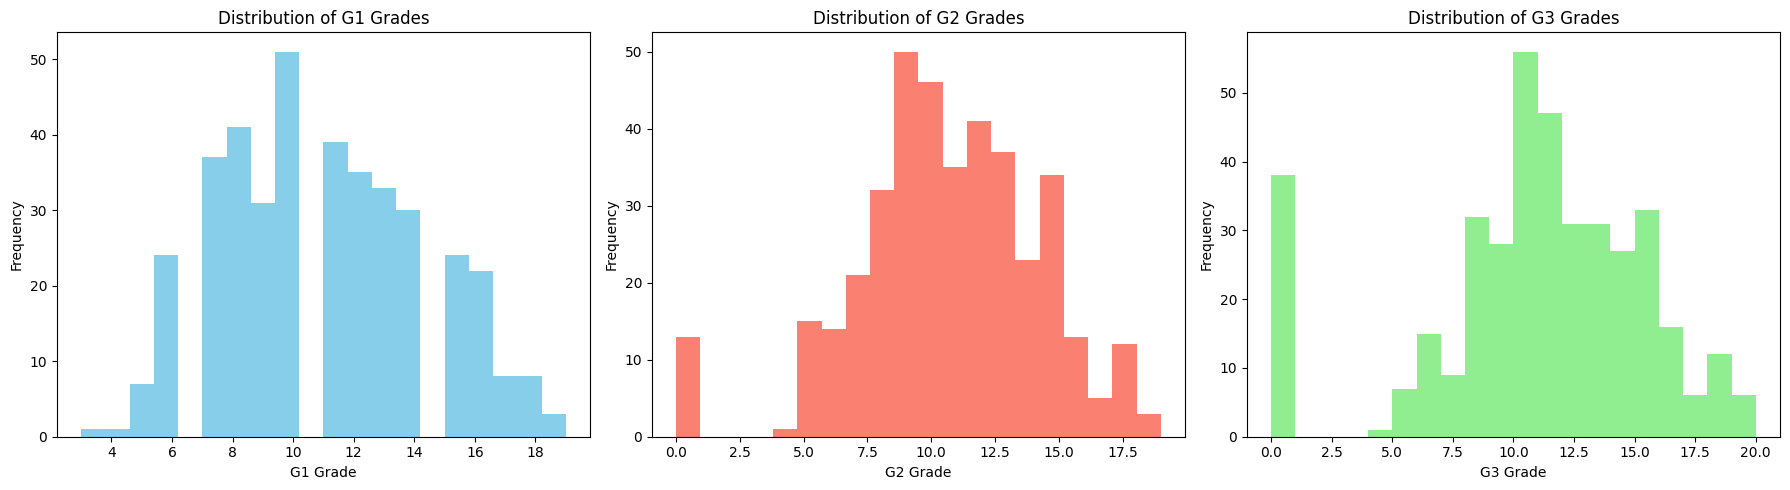

In [28]:
# Plotting histograms for G1, G2, and G3 grades
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(df['G1'], bins=20, color='skyblue')
plt.title('Distribution of G1 Grades')
plt.xlabel('G1 Grade')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['G2'], bins=20, color='salmon')
plt.title('Distribution of G2 Grades')
plt.xlabel('G2 Grade')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['G3'], bins=20, color='lightgreen')
plt.title('Distribution of G3 Grades')
plt.xlabel('G3 Grade')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


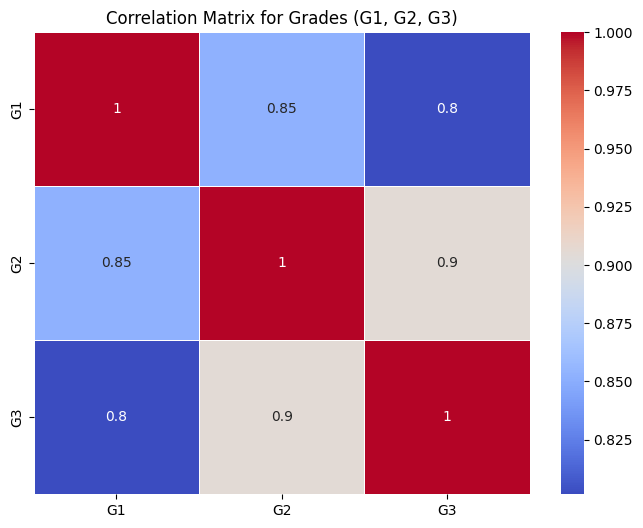

In [29]:
# Calculating correlation matrix
correlation_matrix = df[['G1', 'G2', 'G3']].corr()

# Plotting heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Grades (G1, G2, G3)')
plt.show()


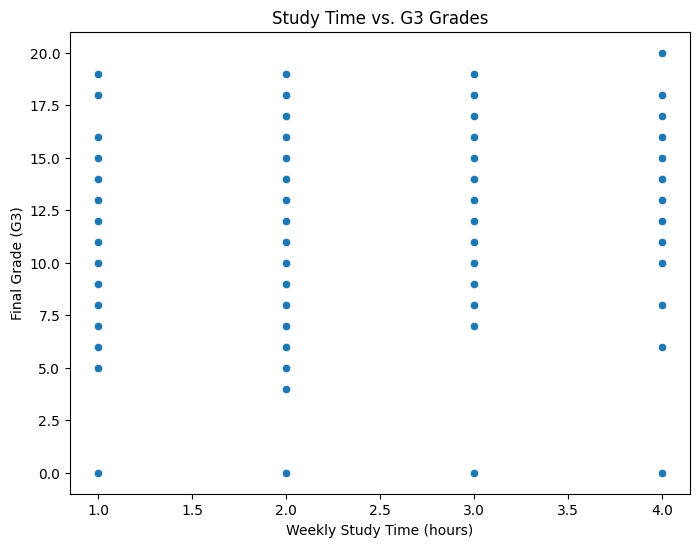

In [30]:
# Plotting scatter plot between study time and G3 grades
plt.figure(figsize=(8, 6))
sns.scatterplot(x='studytime', y='G3', data=df)
plt.title('Study Time vs. G3 Grades')
plt.xlabel('Weekly Study Time (hours)')
plt.ylabel('Final Grade (G3)')
plt.show()


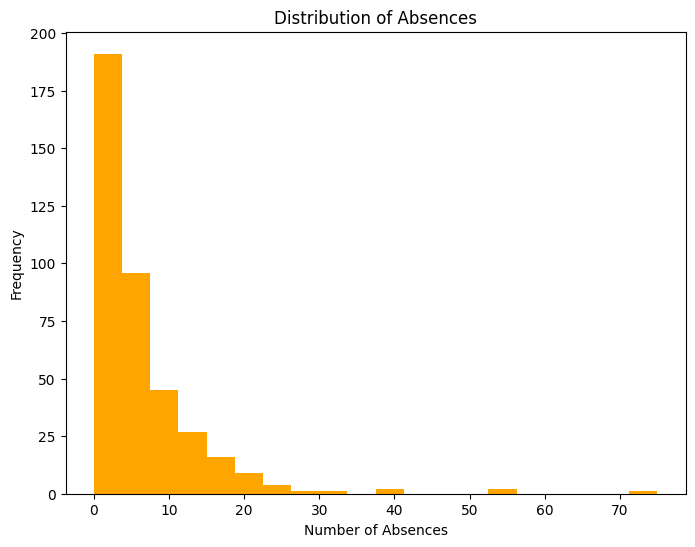

In [31]:
# Plotting histogram for number of absences
plt.figure(figsize=(8, 6))
plt.hist(df['absences'], bins=20, color='orange')
plt.title('Distribution of Absences')
plt.xlabel('Number of Absences')
plt.ylabel('Frequency')
plt.show()
